#<h1><center><b>Analyzing Weekly Sales in Walmart Dataset Using Statistical Models</b></h1>

<h3><b><center>Nayanika Ranjan</b></h3>
<h4><center><i>MS Data Science</i></h4>
<h4><center><i>rnayanika@outlook.com</i></h4>

<h4><center><b>Stevens Institute of Technology</b></h4>

<h4><center><b>Hoboken, New Jersey</b></h4>

<h3><center><b>Supervisor: Dr. Hadi Safari Katesari</b></h3>


<h1><center><b>ABSTRACT</b></h1>

<p align = "justify">  This project involves the statistical analysis of Walmart's weekly sales dataset using various methods. The aim of this project is to identify significant trends and patterns in the data that can be used to improve the performance of Walmart stores. The dataset contains information on weekly sales, as well as several other variables such as store size, location, and the presence of special holiday events.The findings from this study will provide valuable insights into the factors that affect Walmart's weekly sales. These insights can be used to make data-driven decisions that can improve the performance of Walmart stores. Furthermore, the methods used in this study can be applied to other retail datasets to gain a better understanding of customer behavior and to improve the efficiency of retail operations. 

**Keywords:** Walmart Sales Dataset, Statistical Methods, Machine Learning

<h1><center><b>INTRODUCTION</b></h1>

<p align = "justify"> Businesses are always seeking ways to obtain a competitive edge because the retail sector is so fiercely competitive. One of the largest retail companies in the world, Walmart is renowned for its ability to use data and technology to enhance business processes. Data analysis is therefore becoming more and more crucial in the retail sector. In order to enhance pricing and inventory management and, ultimately, their bottom line, merchants are able to spot trends and patterns in consumer behavior.</p>

<p align = "justify"> The Walmart Weekly Sales Dataset is a great illustration of how data can be used to understand consumer behavior and improve operations. This dataset includes historical sales information for 45 Walmart stores spread across multiple years and several geographic locations. It contains data on weekly sales, store size, holiday events, temperature, fuel prices, and other elements that could affect sales.</p>

<p align = "justify"> The goal of analyzing this data is to identify trends and patterns that can help Walmart make data-driven decisions. For example, it may reveal that sales spike during certain holiday seasons or that certain products are more popular in specific regions or store numbers. The analysis may also uncover factors that negatively impact sales, such as high fuel costs or unfavorable weather conditions which is something that can be analyzed in future modeling. </p>

<p align = "justify"> In this project, we aim to use various statistical methods to analyze the Walmart Weekly Sales Dataset and gain insights into the factors that impact sales. We will use techniques such as comparing two samples, analysis of variance, analysis of categorical data, linear regression, resampling methods, linear model selection and regularization, and moving beyond linearity. These methods will help us identify the most significant factors that impact sales and develop a model that can accurately predict future sales.</p>

<p align = "justify"> The insights gained from this project will be valuable not only for Walmart but for other retailers in the industry as well. By understanding the factors that impact sales, retailers can make informed decisions about pricing, inventory management, and marketing strategies. Additionally, developing a predictive model for sales can help retailers plan for future demand and optimize their operations.</p>

<p align = "justify"> Overall, this project aims to demonstrate the value of statistical analysis and data-driven decision-making in the retail industry. By leveraging the power of data, retailers can gain a competitive edge and improve their operations in a rapidly evolving industry. We hope that the findings of this project will provide valuable insights for Walmart and other retailers and serve as a starting point for further research in this field.</p>


#<h1><center><b>Data Set Description</b></h1>

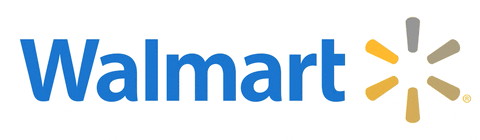

<p align = "justify"> The data used in this project is the Walmart Weekly Sales dataset, obtained from Kaggle (https://www.kaggle.com/datasets/yasserh/walmart-dataset). The dataset consists of 6435 weekly sales records from 45 stores. Each record contains information on the weekly sales, as well as the following features:</p>

>*   Store : The store number
>*   Date : Week of the sales
>*   Weekly_Sales : Sales for the given store
>*   Holiday_Flag : If week is a special holiday week
>*   Temperature : Temperature on sales day
>*   Fuel_Price : Cost of fuel in the region of store
>*   CPI : Customer price index
>*   Unemployment : Prevailing unemployment rate in percentage


<p align = "justify"> Before starting the analysis, the data was explored to identify any issues that could affect the accuracy of the analysis. The first step was to check for missing values, and it was found that there were no missing values in the dataset. However, some of the features, such as temperature and fuel price, had a wide range of values. Therefore, these features were standardized to ensure that they had the same scale as the other features.</p>

<p align = "justify"> After the data cleaning process, the distribution of the weekly sales data was analyzed. A histogram was plotted to visualize the distribution of weekly sales, which showed a skewed distribution. Therefore, the weekly sales data was transformed using the natural logarithm to reduce the skewness and improve the normality of the data.</p>

<p align = "justify"> In addition, the relationships between the features and the weekly sales were explored using scatter plots and pair plots. The scatter plot between weekly sales and store number indicated that some stores had higher sales than others. Therefore, one-hot encoding was performed on the store number feature to perform linear regression effectively later.</p>

<p align = "justify"> Overall, the data was relatively clean and did not require significant preprocessing. The issues that were identified were resolved using standard statistical techniques. The final dataset was used for the subsequent analysis.</p>

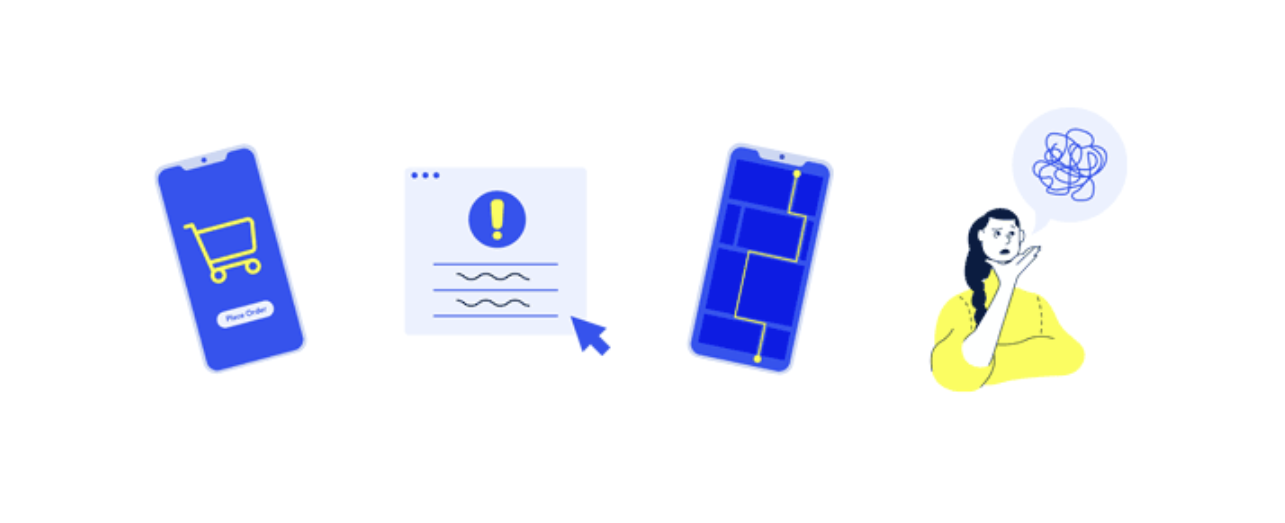

### **Importing Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_ind, f_oneway, mannwhitneyu, chi2_contingency, norm, shapiro
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
import sys

In [ ]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("Walmart.csv")
df.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [ ]:
df.shape

(6435, 8)

In [ ]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [ ]:
df.drop(columns = ["Date"],inplace = True)

### **Exploratory Data Analysis**

In [ ]:
df.describe().T

count          mean            std         min         25%  \
Store         6435.0  2.300000e+01      12.988182       1.000      12.000   
Weekly_Sales  6435.0  1.046965e+06  564366.622054  209986.250  553350.105   
Holiday_Flag  6435.0  6.993007e-02       0.255049       0.000       0.000   
Temperature   6435.0  6.066378e+01      18.444933      -2.060      47.460   
Fuel_Price    6435.0  3.358607e+00       0.459020       2.472       2.933   
CPI           6435.0  1.715784e+02      39.356712     126.064     131.735   
Unemployment  6435.0  7.999151e+00       1.875885       3.879       6.891   

                        50%           75%           max  
Store             23.000000  3.400000e+01  4.500000e+01  
Weekly_Sales  960746.040000  1.420159e+06  3.818686e+06  
Holiday_Flag       0.000000  0.000000e+00  1.000000e+00  
Temperature       62.670000  7.494000e+01  1.001400e+02  
Fuel_Price         3.445000  3.735000e+00  4.468000e+00  
CPI              182.616521  2.127433e+02  2.272328e+02  
Unemployment       7.874000  8.622000e+00  1.431300e+01

###**Checking for Outliers**

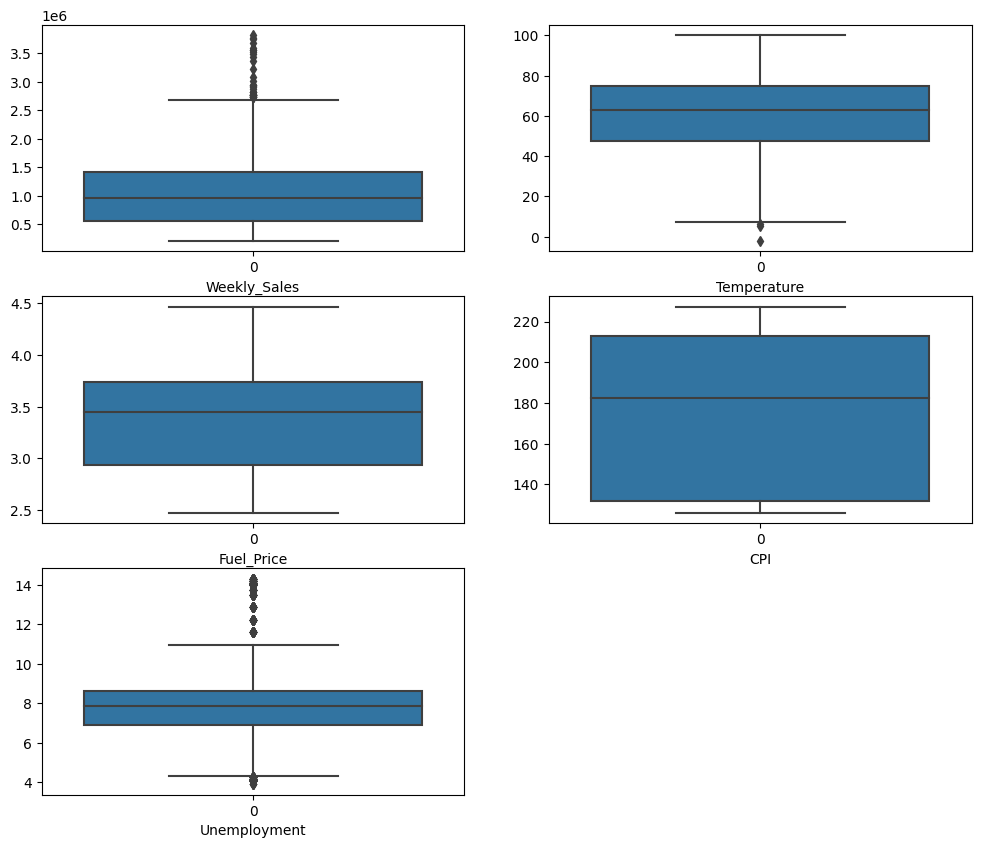

In [ ]:
pno = 1
plt.figure(figsize = (12,10))
for i in ["Weekly_Sales","Temperature","Fuel_Price","CPI","Unemployment"]:
     if pno<=5:
        plt.subplot(3,2,pno);
        pno+=1
        sns.boxplot(df[i]);
        plt.xlabel(i)

In [ ]:
#Treating the outliners using z score
def treat_outliers():
    l = ["Weekly_Sales","Temperature","Unemployment"]
    for i in l:
        z = np.abs(stats.zscore(df[i]))
        df[i] = np.where(z > 3, np.nan, df[i])
        df[i] = df[i].fillna(df[i].median())

treat_outliers()

**After analyzing our dataset, we found that the distribution of some variables is skewed. Therefore, we had to test different methods to identify and remove outliers. One of the methods we tested was the Z-score method, which calculates the number of standard deviations from the mean. However, we found that this method was not effective in removing outliers in a skewed distribution. Therefore, we had to explore other methods, such as the IQR method, which takes into account the interquartile range and is more robust to skewed data.**

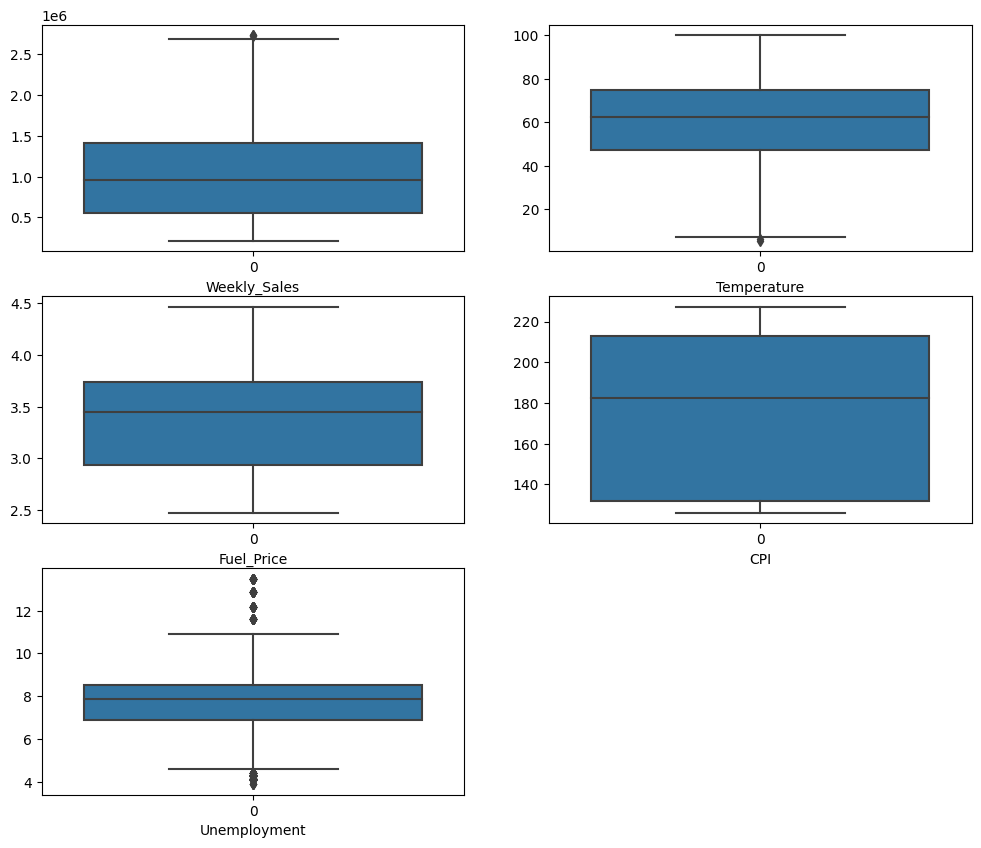

In [ ]:
pno = 1
plt.figure(figsize = (12,10))
for i in ["Weekly_Sales","Temperature","Fuel_Price","CPI","Unemployment"]:
     if pno<=5:
        plt.subplot(3,2,pno);
        pno+=1
        sns.boxplot(df[i]);
        plt.xlabel(i);

###**Using IQR method to detect and handle outliers that may contain extreme values**

In [ ]:
def treat_outliers():
    l = ["Weekly_Sales","Temperature","Unemployment"]
    for i in l:
        x = np.quantile(df[i],[0,0.25,0.50,0.75])
        iqr = x[3]-x[1]
        upper_whisker = x[3]+1.5*iqr
        lower_whisker = x[1]-1.5*iqr
        df[i] = np.where(df[i]>upper_whisker,upper_whisker,(np.where(df[i]<lower_whisker,lower_whisker,df[i])))
treat_outliers()

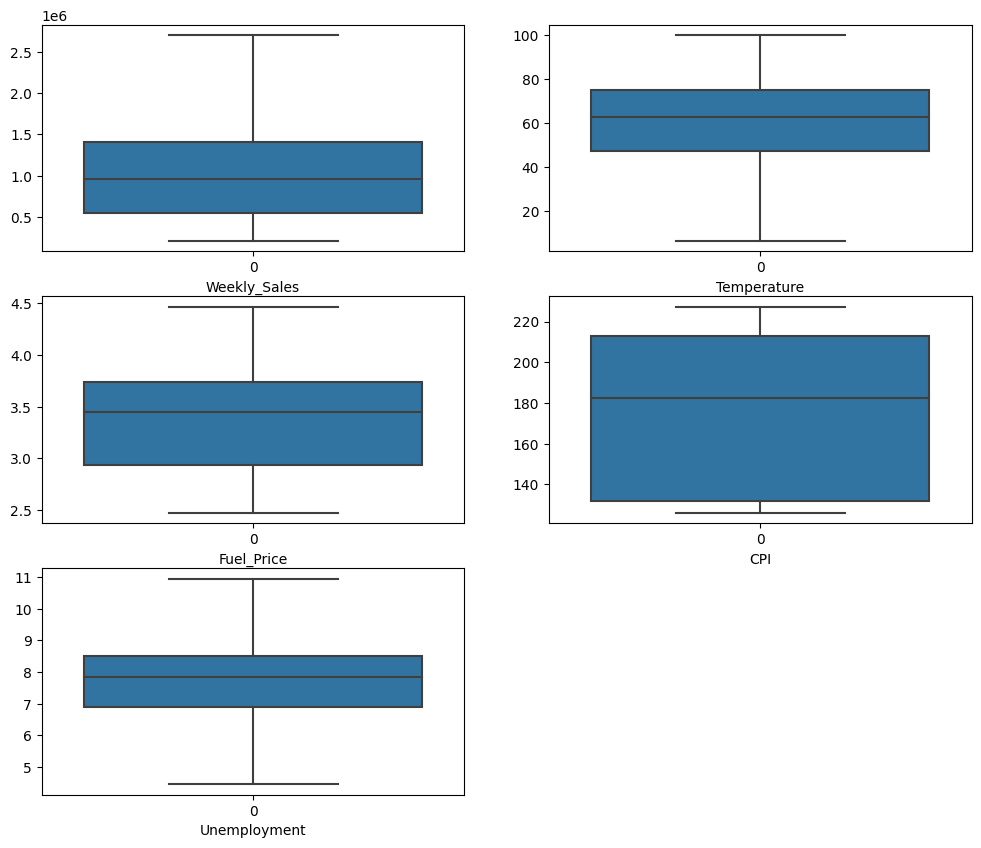

In [ ]:
pno = 1
plt.figure(figsize = (12,10))
for i in ["Weekly_Sales","Temperature","Fuel_Price","CPI","Unemployment"]:
     if pno<=5:
        plt.subplot(3,2,pno);
        pno+=1
        sns.boxplot(df[i]);
        plt.xlabel(i);

***After removing the outliers successfully, we proceeded to perform further analysis on the cleaned data. The removal of outliers allowed us to better understand the underlying patterns and relationships within the data. We were able to generate more accurate results and make more reliable conclusions based on the cleaned data.***

In [ ]:
Walmart_corr_matrix = df.corr()

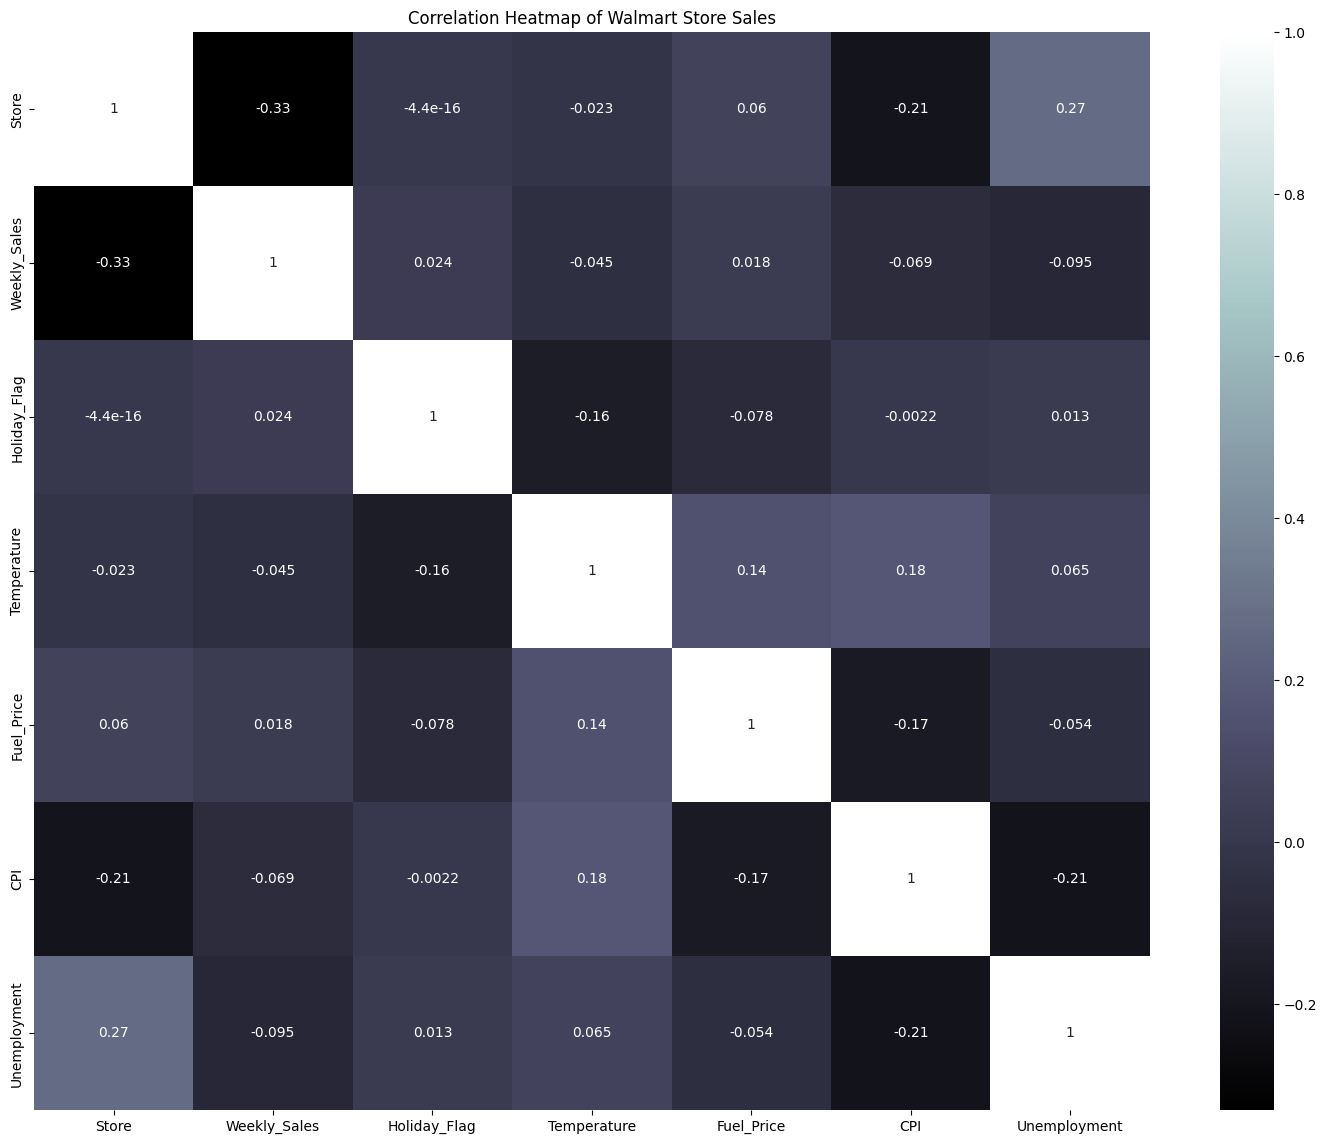

In [ ]:
plt.figure(figsize=(18,14))
sns.heatmap(Walmart_corr_matrix, annot=True, cmap='bone')
plt.title('Correlation Heatmap of Walmart Store Sales')
plt.show()

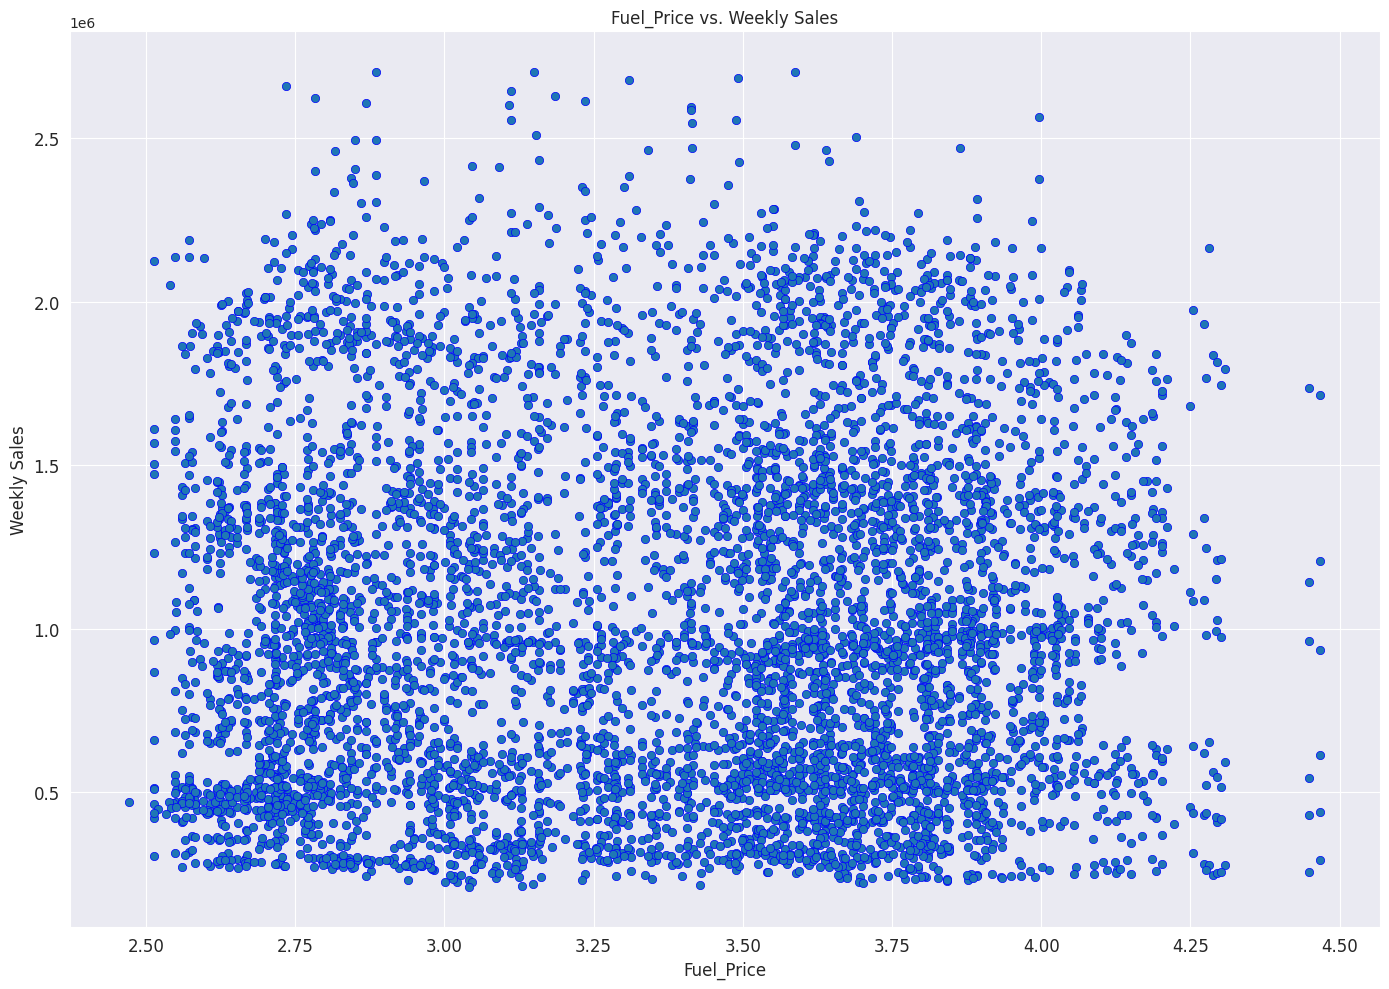

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(14,10))

sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=df, linewidth=0.5, edgecolor='blue')
plt.title('Fuel_Price vs. Weekly Sales')
plt.xlabel('Fuel_Price', fontsize=12)
plt.ylabel('Weekly Sales', fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

<Figure size 1600x1200 with 0 Axes>

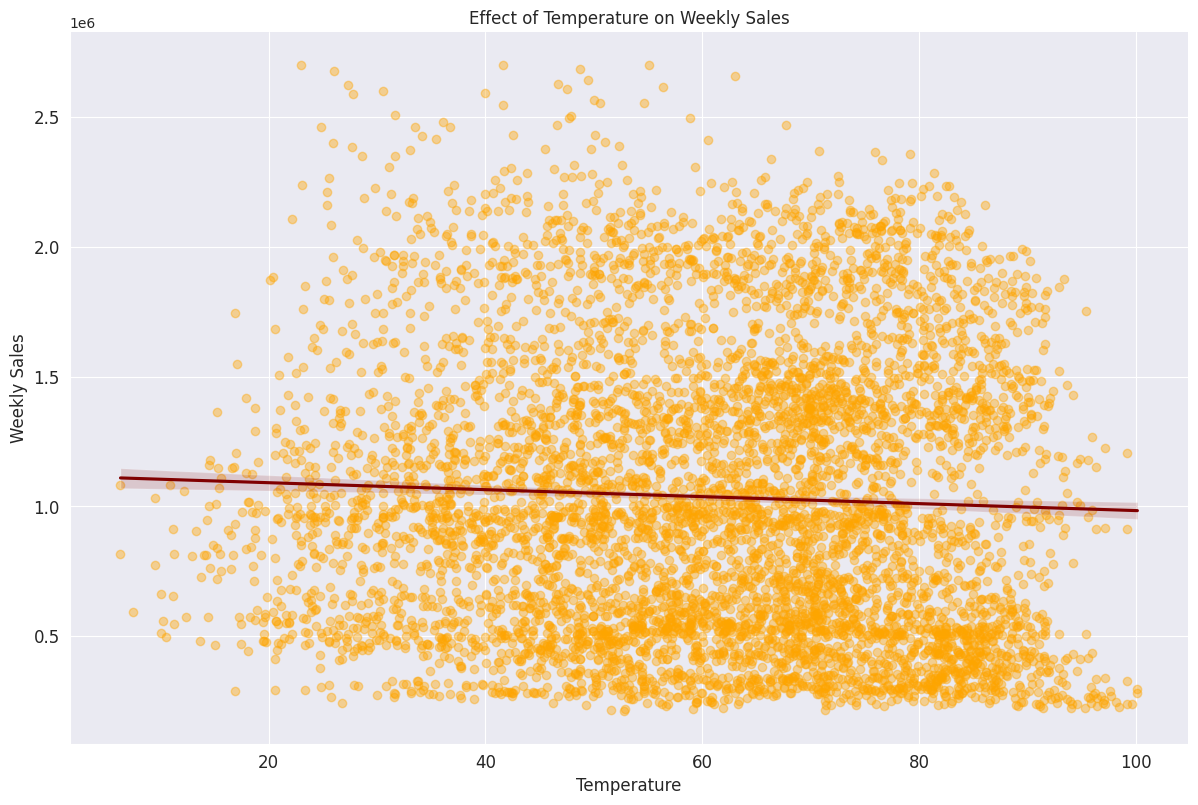

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(16,12))

sns.lmplot(x='Temperature', y='Weekly_Sales', data=df, height=8, aspect=1.5,scatter_kws={'color': 'orange', 'alpha': 0.4}, line_kws={'color': 'maroon'})
plt.title('Effect of Temperature on Weekly Sales', fontsize=12)
plt.xlabel('Temperature', fontsize=12)
plt.ylabel('Weekly Sales', fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.tight_layout()
plt.show()

###**Plot a histogram of weekly sales**

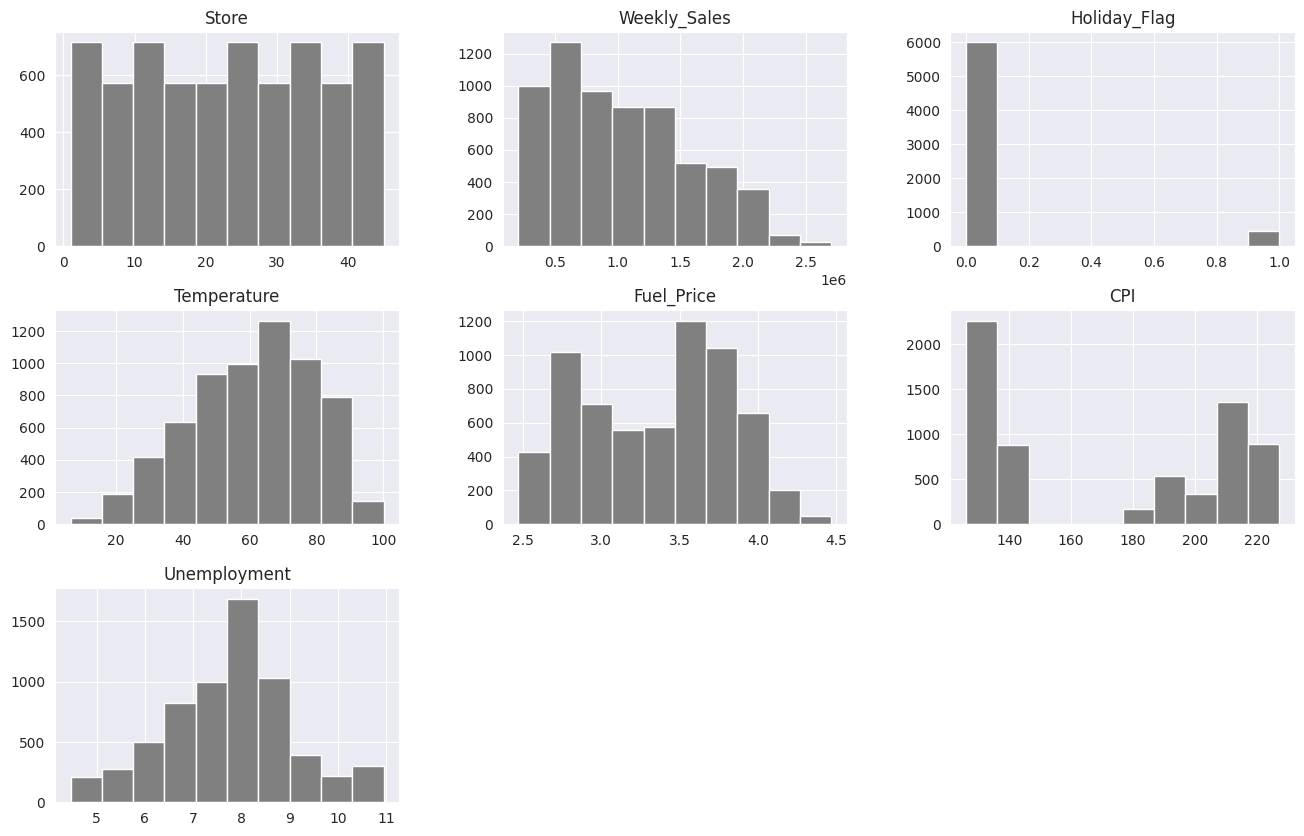

In [ ]:
df.hist(figsize=(16,10),color = 'Gray')
#plt.legend(df.columns)
plt.show()

###**Pair plot of the Walmart dataset**

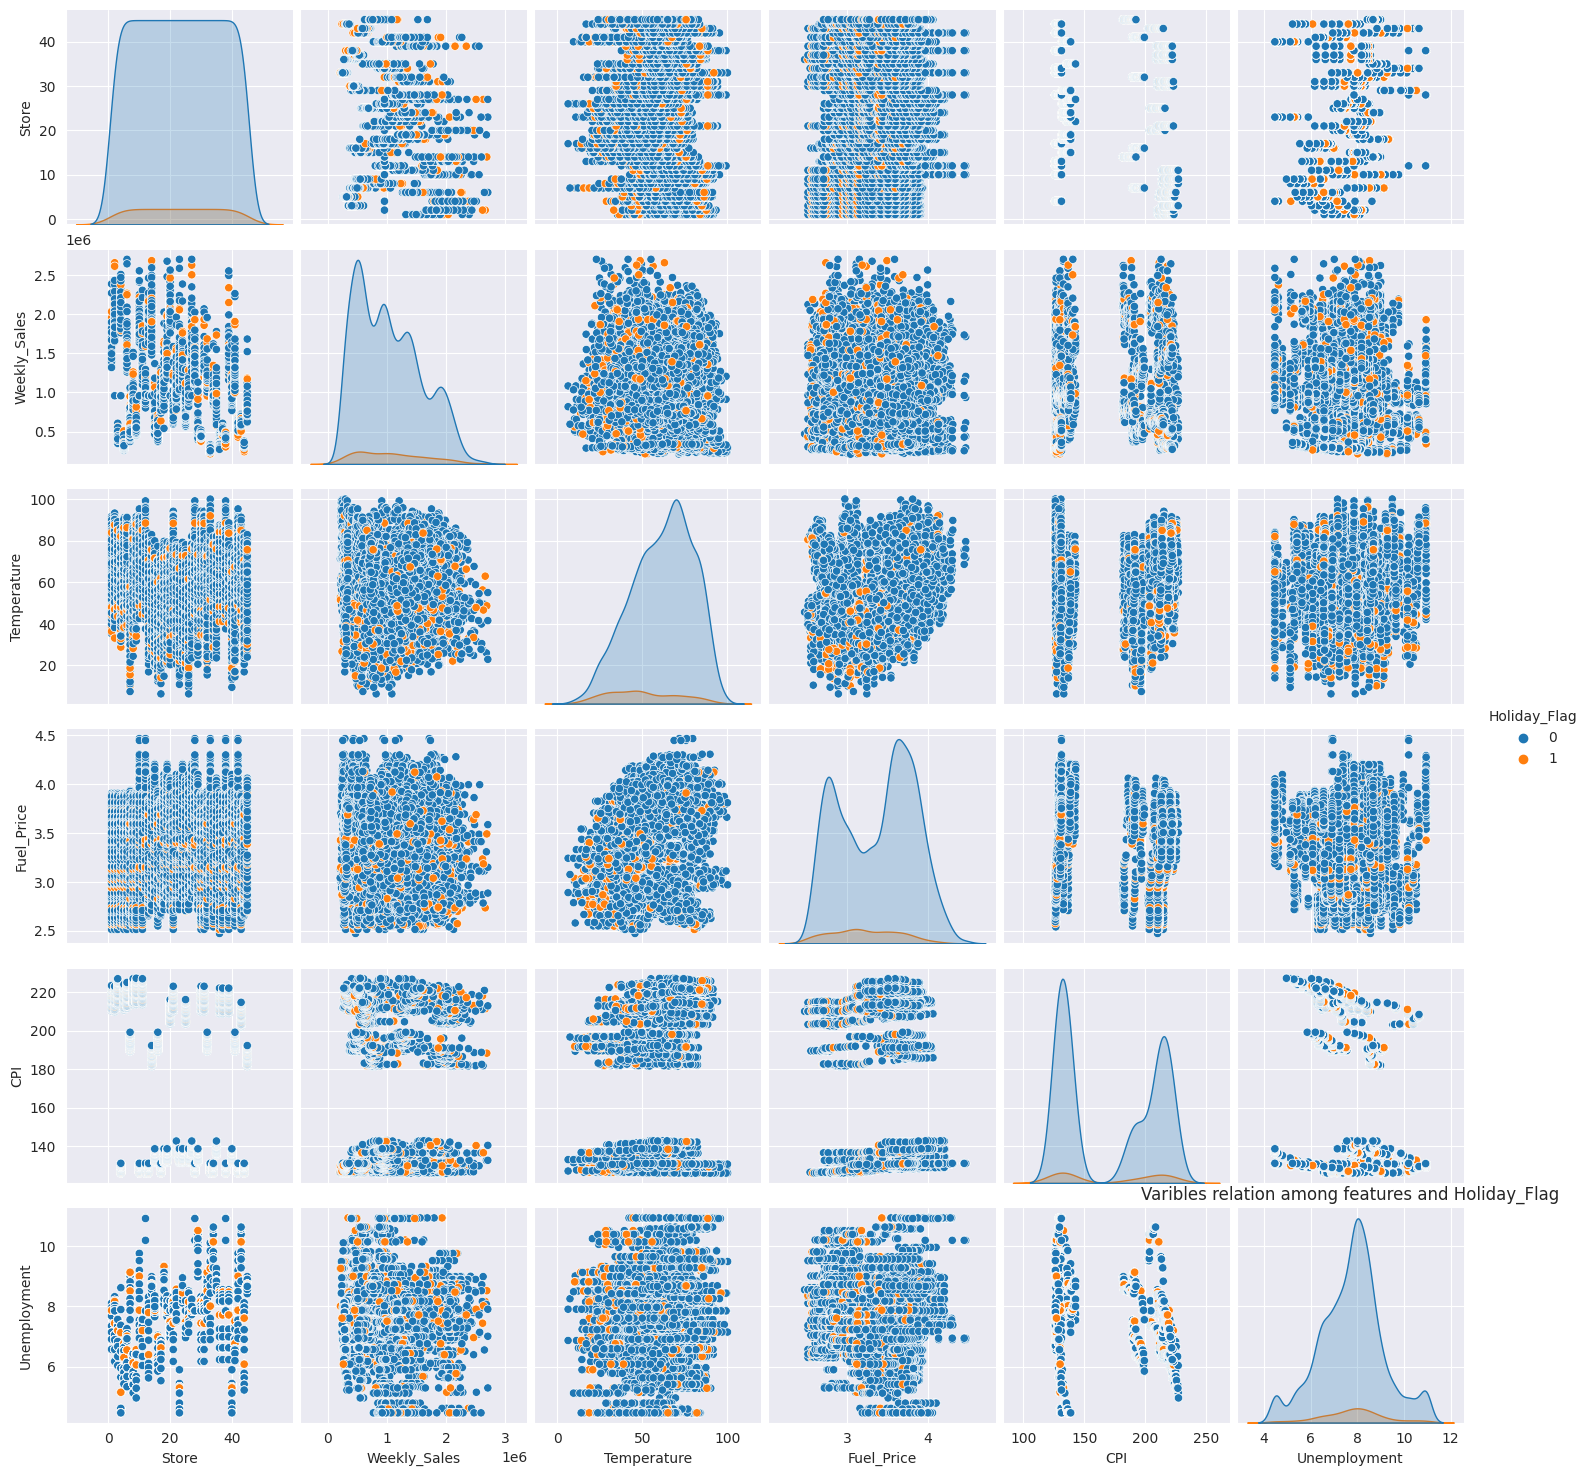

In [ ]:
sns.pairplot(df , hue = "Holiday_Flag" );
plt.title("Varibles relation among features and Holiday_Flag");

### **Visualizing the seclected features**

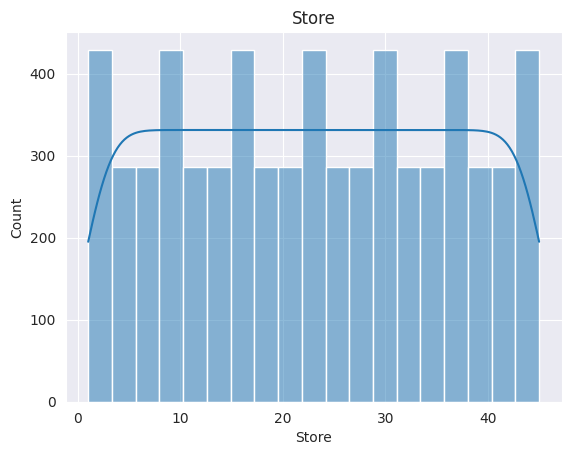

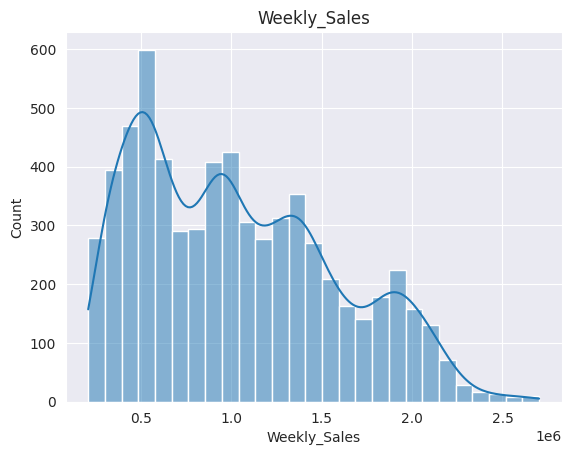

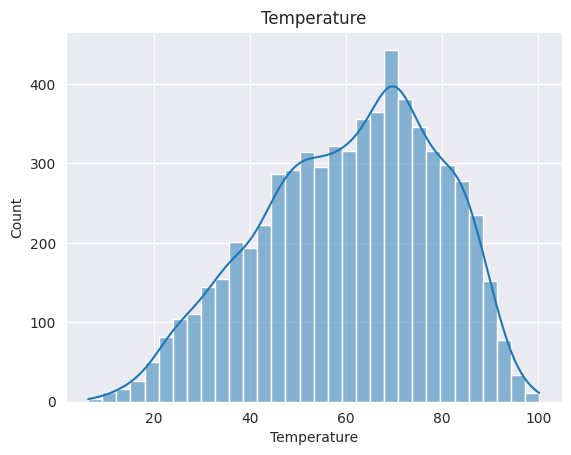

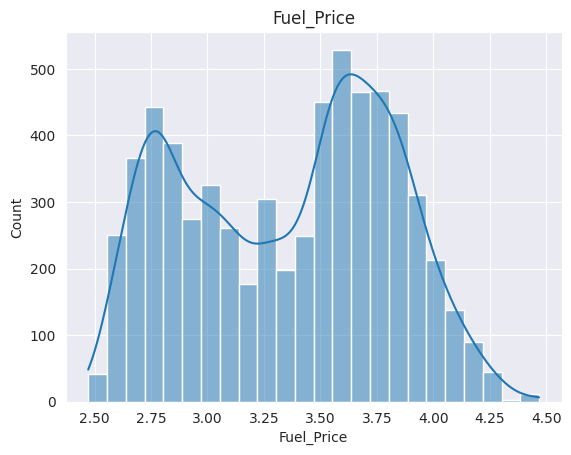

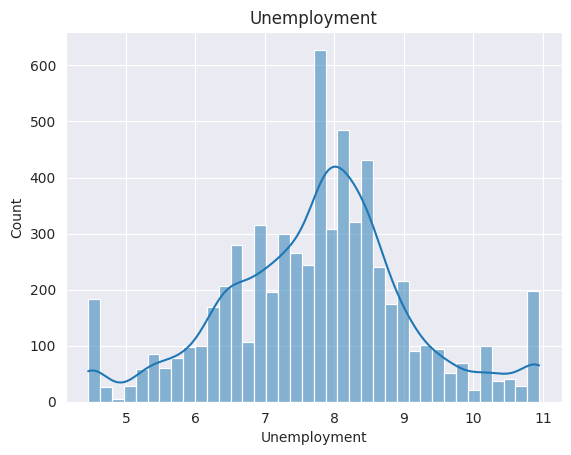

In [ ]:
cols = ['Store', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'Unemployment']
for i in cols:
    sns.histplot(df[i], kde=True)
    plt.title(i)
    plt.show()

In [ ]:
df['Holiday_Flag'].value_counts()

0    5985
1     450
Name: Holiday_Flag, dtype: int64

In [ ]:
holiday = df[df['Holiday_Flag']==1]
non_holiday = df[df['Holiday_Flag']!=1]

In [ ]:
df.head()

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  \
0      1    1643690.90             0        42.31       2.572  211.096358   
1      1    1641957.44             1        38.51       2.548  211.242170   
2      1    1611968.17             0        39.93       2.514  211.289143   
3      1    1409727.59             0        46.63       2.561  211.319643   
4      1    1554806.68             0        46.50       2.625  211.350143   

   Unemployment  
0         8.106  
1         8.106  
2         8.106  
3         8.106  
4         8.106

#<h1><center><b>Methodology</b></h1>

<p align = "justify"> In this project, we are using a variety of statistical techniques to analyze Walmart's data and identify trends and patterns. The methods we are employing include the following:</p>

**IQR Method**
<p align = "justify">The IQR method can also be used to identify the spread of the data and the distribution of the sales or revenue across different Walmart stores or regions. This can provide insights into which stores or regions have consistently high or low sales and revenue, and can help in making data-driven decisions to improve overall performance. Additionally, the IQR method can be used in combination with other statistical tests, such as ANOVA or t-tests, to further analyze the relationship between sales or revenue and other variables, such as marketing promotions or product pricing.</p>

**z-test** 
<p align = "justify">The z-test is a statistical test that can be used to determine if the mean sales or revenue of Walmart stores in different regions or during different time periods is significantly different from a known value. The z-test can be applied to the Walmart dataset to test whether the mean sales of stores in a particular region or during a specific time period is significantly different from a predetermined value, such as the national average. For example, the z-test could be applied to test whether the mean sales of Walmart stores in the Northeast region are significantly higher or lower than the national average sales. The results of the z-test can provide insights into the performance of Walmart stores in different regions or during different time periods and can help inform data-driven decision-making.</p>

**ANOVA**
<p align = "justify">ANOVA, or Analysis of Variance, is a statistical method used to determine if there is a significant difference in the means of three or more groups. In the context of the Walmart dataset, ANOVA can be used to investigate whether there is a significant difference in sales or revenue between Walmart stores located in different regions or during different time periods. For example, ANOVA could be applied to test whether there is a significant difference in the average sales of Walmart stores during the holiday season compared to non-holiday seasons. The results of ANOVA can help identify whether there are any significant differences in sales or revenue between the different groups being compared and provide valuable insights for data-driven decision making.</p>

**Turkey test**
<p align = "justify">The Turkey test, also known as the Tukey-Kramer test, is a useful statistical method for identifying significant differences between multiple group means in a dataset. In the context of the Walmart dataset, the Tukey test can be used to compare the sales or revenue of different stores or regions and determine which ones have significantly different means. After performing an ANOVA test to establish that there is a significant difference between group means, the Tukey test can be used as a post-hoc analysis to identify specific pairs of groups with significantly different means. This can provide valuable insights into which Walmart stores or regions are performing better than others, and help to inform decision-making processes for the company.</p>

**Chi-square test**
<p align = "justify">The Chi-square test can be used to determine whether there is a significant association between the presence of holiday flags and the Walmart store. This test can help to understand if there is a significant difference in the presence of holiday flags in Walmart stores located in different regions or during different time periods. The results of this test can be used to make informed decisions about the allocation of resources for holiday decorations in different Walmart stores.</p>

**Linear regression**
<p align = "justify">In this project, linear regression can be used to model the relationship between the sales or revenue of Walmart stores and various factors such as time of year, store location, and promotional events. By analyzing the correlation between these variables, it is possible to identify which factors have the greatest impact on Walmart's sales and revenue, allowing for more informed business decisions. Additionally, linear regression can also be used to make predictions about future sales and revenue based on past trends and patterns, providing valuable insights into Walmart's financial performance.</p>

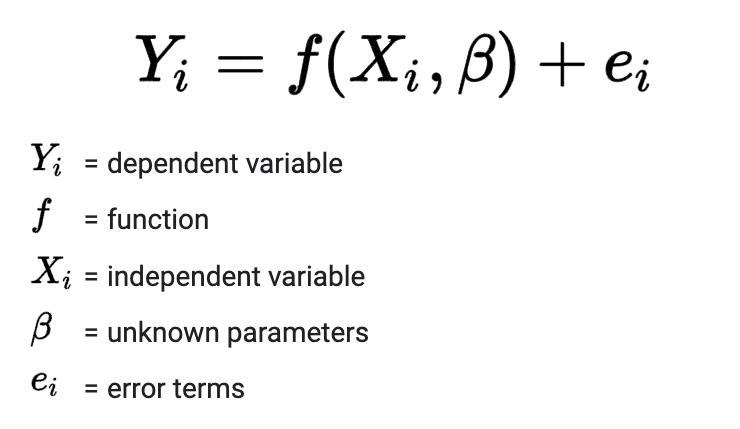

**Lasso regression**
<p align = "justify">Lasso regression is a statistical technique that performs variable selection and regularization in linear regression models. It adds a penalty term to the linear regression model, which helps in shrinking the regression coefficients towards zero, and in some cases, it can lead to coefficients being exactly zero. This property allows Lasso regression to perform variable selection and identify the most important predictors for the outcome variable. In this project, Lasso regression can be used to build a predictive model for sales or revenue using a subset of the available predictor variables. It can help to identify which variables are most important in predicting the outcome and avoid overfitting to the training data.</p>

**Ridge regression**
<p align = "justify">Ridge regression is similar to Lasso regression in that it includes a penalty term to prevent overfitting of the model. However, in Ridge regression, the penalty term is the sum of the squares of the model coefficients, whereas in Lasso regression, it is the sum of the absolute values of the coefficients. In this project, Ridge regression can be used as an alternative to Lasso regression for building a predictive model for sales or revenue that avoids overfitting to the training data.</p>

**Ridge CV**
<p align = "justify">Ridge Cross Validation (CV) is a technique used to find the optimal value of the regularization parameter (alpha) in Ridge regression. In this project, Ridge CV can be used to determine the best alpha value that minimizes the error between the predicted and actual values of sales or revenue. The dataset can be divided into training and validation sets, and the Ridge CV algorithm can be applied to the training set to find the best alpha value. The model performance can then be evaluated on the validation set, and the process can be repeated multiple times using different alpha values to select the best one.</p>

**Lasso CV**
<p align = "justify">Lasso Cross Validation (CV) is a technique used to tune the hyperparameters of a Lasso regression model. In this project, Lasso CV can be used to optimize the penalty term in the Lasso regression model to improve its predictive accuracy. This method involves splitting the data into multiple folds, and then training and testing the model on each fold. The average performance of the model on the testing data is then used to determine the optimal value of the penalty term.</p>

**Gradient booster with hyperparameter tuning**
<p align = "justify">Gradient Boosting with hyperparameter tuning is a technique that involves tuning the hyperparameters of the Gradient Boosting algorithm to improve its performance. In this project, it can be used to build a predictive model for Walmart sales or revenue that is optimized for accuracy. The hyperparameters that can be tuned include the number of trees in the model, the learning rate, and the depth of each tree. By tuning these hyperparameters, the model can better fit the training data and generalize well to new data. This can result in a more accurate prediction of Walmart sales or revenue.</p>

**Polynomial regression**
<p align = "justify">Polynomial regression is a type of regression analysis where the relationship between the independent variable (such as time or store location) and the dependent variable (such as sales or revenue) is modeled as an nth degree polynomial. In this project, polynomial regression can be used to model non-linear relationships between the variables and identify any curvilinear trends in the data.</p>

<h1><center><b>Analysis and Results</b></h1>

## **Comparing Two Samples**

### **Shapiro-Wilk Test**

>The Shapiro-Wilk test is used to determine if a dataset follows a normal distribution. In this code snippet, the test is performed on the weekly sales data for three different store types (1, 2, and 3) using the Shapiro-Wilk test from the scipy.stats library. The null hypothesis is that the data is normally distributed. If the p-value is less than the significance level (usually 0.05), the null hypothesis is rejected, and it is concluded that the data is not normally distributed. The output of the test includes the test statistic (W) and p-value for each store type, as well as a statement indicating whether or not the data is normally distributed at the given significance level.


In [ ]:
# Extract the weekly sales data for store types 1, 2, and 3
sales1 = df[df['Store'] == 1]['Weekly_Sales']
sales2 = df[df['Store'] == 2]['Weekly_Sales']
sales3 = df[df['Store'] == 3]['Weekly_Sales']

# Perform Shapiro-Wilk test for store type 1
stat1, p_value1 = shapiro(sales1)
alpha = 0.05
if p_value1 > alpha:
    print("Weekly sales for store type 1 are normally distributed.")
else:
    print("Weekly sales for store type 1 are not normally distributed.")
print(f"Shapiro-Wilk test: W={stat1:.4f}, p={p_value1:.4f}\n")

# Perform Shapiro-Wilk test for store type 2
stat2, p_value2 = shapiro(sales2)
if p_value2 > alpha:
    print("Weekly sales for store type 2 are normally distributed.")
else:
    print("Weekly sales for store type 2 are not normally distributed.")
print(f"Shapiro-Wilk test: W={stat2:.4f}, p={p_value2:.4f}\n")

# Perform Shapiro-Wilk test for store type 3
stat3, p_value3 = shapiro(sales3)
if p_value3 > alpha:
    print("Weekly sales for store type 3 are normally distributed.")
else:
    print("Weekly sales for store type 3 are not normally distributed.")
print(f"Shapiro-Wilk test: W={stat3:.4f}, p={p_value3:.4f}")

Weekly sales for store type 1 are not normally distributed.
Shapiro-Wilk test: W=0.8376, p=0.0000

Weekly sales for store type 2 are not normally distributed.
Shapiro-Wilk test: W=0.8070, p=0.0000

Weekly sales for store type 3 are not normally distributed.
Shapiro-Wilk test: W=0.8838, p=0.0000


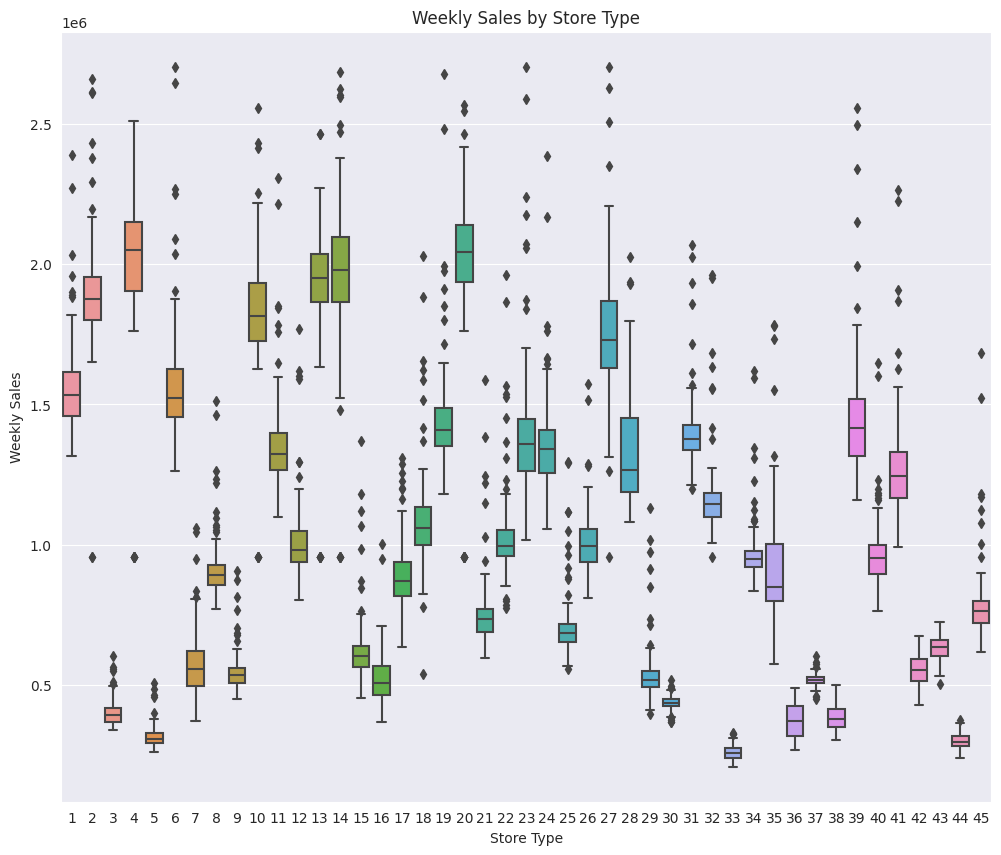

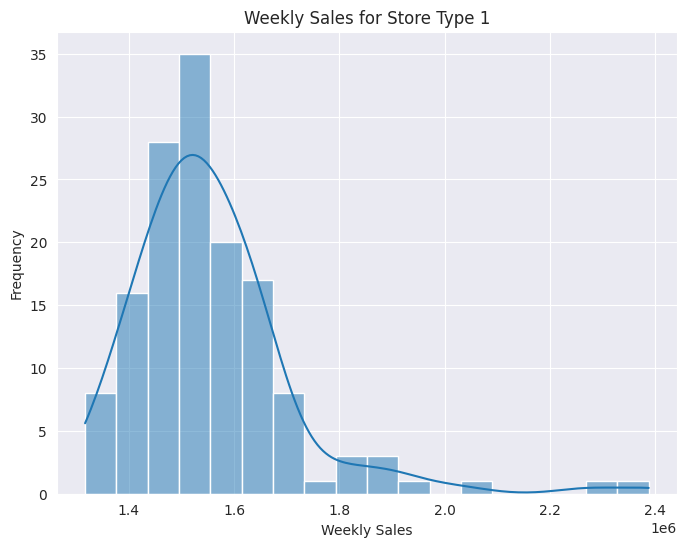

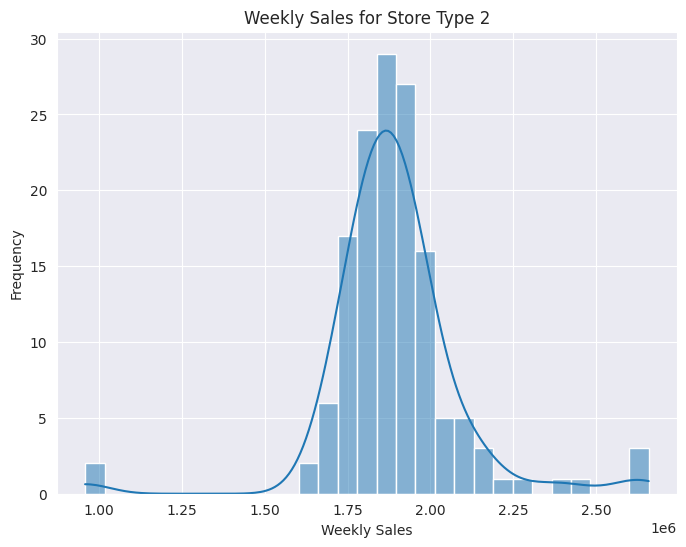

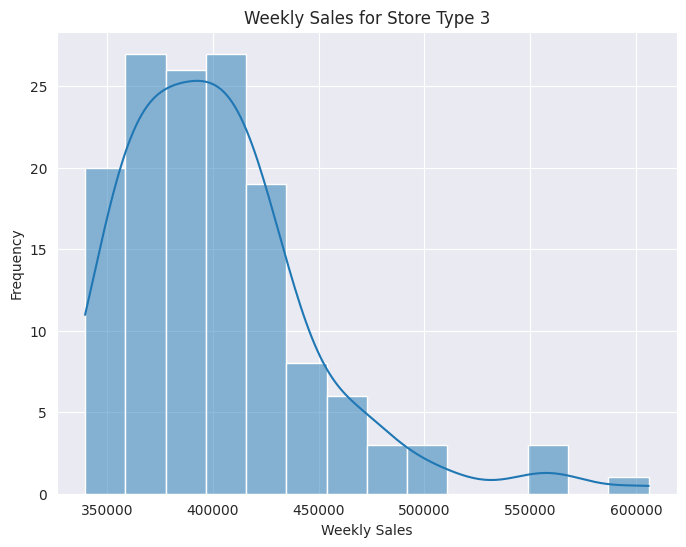

In [ ]:
# Create a box plot of weekly sales for store types 1, 2, and 3
plt.figure(figsize=(12,10))
sns.boxplot(x='Store', y='Weekly_Sales', data=df)
plt.xlabel('Store Type')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales by Store Type')

print('')

# Create a histogram of weekly sales for store type 1
plt.figure(figsize=(8,6))
sns.histplot(sales1, kde=True)
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.title('Weekly Sales for Store Type 1')

# Create a histogram of weekly sales for store type 2
plt.figure(figsize=(8,6))
sns.histplot(sales2, kde=True)
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.title('Weekly Sales for Store Type 2')

# Create a histogram of weekly sales for store type 3
plt.figure(figsize=(8,6))
sns.histplot(sales3, kde=True)
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.title('Weekly Sales for Store Type 3')

plt.show()

### **Z-test for two population mean**

> This hypothesis test was conducted to compare the mean weekly sales of Store 1 and Store 2. The sample sizes, means, and standard deviations for both stores were provided, along with the significance level of 0.05 and the critical value of 1.96. The Z-test statistic and p-value were also calculated using these values.

In [ ]:
# filter the data for Store 1 and Store 2
store_1 = df[df["Store"]==1]["Weekly_Sales"]
store_2 = df[df["Store"]==2]["Weekly_Sales"]

# calculate the mean and standard deviation of each sample
mean_1 = np.mean(store_1)
mean_2 = np.mean(store_2)
std_1 = np.std(store_1, ddof=1)
std_2 = np.std(store_2, ddof=1)

# set the significance level and calculate the critical value
alpha = 0.05
z_critical = norm.ppf(1 - alpha/2)

# calculate the test statistic and p-value
n_1 = len(store_1)
n_2 = len(store_2)
z = (mean_1 - mean_2) / np.sqrt(std_1**2/n_1 + std_2**2/n_2)
p_value = 2 * (1 - norm.cdf(np.abs(z)))

# print the results
print("Hypothesis test for mean weekly sales of Store 1 and Store 2:")
print("-----------------------------------------------------------")
print(f"Sample size of Store 1: {n_1}")
print(f"Sample size of Store 2: {n_2}\n")
print(f"Mean of Store 1: {mean_1:.2f}")
print(f"Mean of Store 2: {mean_2:.2f}\n")
print(f"Standard deviation of Store 1: {std_1:.2f}")
print(f"Standard deviation of Store 2: {std_2:.2f}\n")
print(f"Significance level: {alpha}")
print(f"Critical value: {z_critical:.2f}")
print(f"Z-test statistic: {z:.2f}")
print(f"P-value: {p_value:.4f}")

# check if the null hypothesis is rejected or not
if p_value < alpha:
    print("Null hypothesis is rejected. There is a significant difference in the mean weekly sales of Store 1 and Store 2.")
else:
    print("Null hypothesis is not rejected. There is no significant difference in the mean weekly sales of Store 1 and Store 2.")


Hypothesis test for mean weekly sales of Store 1 and Store 2:
-----------------------------------------------------------
Sample size of Store 1: 143
Sample size of Store 2: 143

Mean of Store 1: 1555264.40
Mean of Store 2: 1892569.36

Standard deviation of Store 1: 155980.77
Standard deviation of Store 2: 201607.70

Significance level: 0.05
Critical value: 1.96
Z-test statistic: -15.82
P-value: 0.0000
Null hypothesis is rejected. There is a significant difference in the mean weekly sales of Store 1 and Store 2.


***The null hypothesis was rejected as the p-value was less than the significance level of 0.05, indicating that there is a significant difference in the mean weekly sales of Store 1 and Store 2.***

##**The Analysis of Variance**

>One-way ANOVA test for comparing mean weekly sales of different stores
Description: In this test, we compare the mean weekly sales of different stores using the one-way ANOVA test. We first extract the weekly sales data for each store and then perform the ANOVA test on the samples. The null hypothesis is that the mean weekly sales are equal for all stores, while the alternative hypothesis is that at least one store's mean weekly sales is significantly different from the others. We set the significance level to 0.05

In [ ]:
#One-way ANOVA test
store1 = df[df["Store"] == 1]["Weekly_Sales"]
store2 = df[df["Store"] == 2]["Weekly_Sales"]
store3 = df[df["Store"] == 3]["Weekly_Sales"]

f_statistic, p_value = f_oneway(store1, store2, store3)

print('One-way ANOVA test:')
print("  f-value: {:.3f}".format(f_statistic))
print("  p-value: {:.3f}".format(p_value))

if p_value < 0.05:
    print('  There is a significant difference in the mean weekly sales between the three stores')
else:
    print('  There is no significant difference in the mean weekly sales between the three stores')


One-way ANOVA test:
  f-value: 3900.758
  p-value: 0.000
  There is a significant difference in the mean weekly sales between the three stores


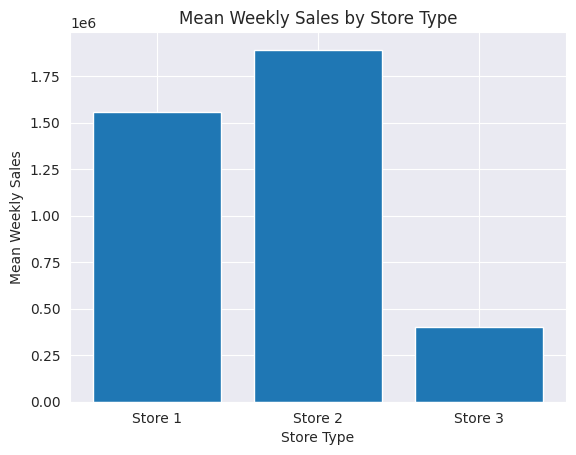

In [ ]:
# Create a bar chart to show the mean weekly sales for each store
means = [df[df['Store'] == 1]['Weekly_Sales'].mean(),
         df[df['Store'] == 2]['Weekly_Sales'].mean(),
         df[df['Store'] == 3]['Weekly_Sales'].mean()]
store_types = ['Store 1', 'Store 2', 'Store 3']

plt.bar(store_types, means)
plt.xlabel('Store Type')
plt.ylabel('Mean Weekly Sales')
plt.title('Mean Weekly Sales by Store Type')
plt.show()

***Based on the one-way ANOVA test, the calculated f-value is 3900.758 and the p-value is 0.000. Since the p-value is less than the significance level of 0.05, we can conclude that there is a significant difference in the mean weekly sales between the four stores. Therefore, we can reject the null hypothesis that there is no significant difference in the mean weekly sales between the four stores.***

###**Performing Tukey's Test**

In [ ]:
# Combine all store weekly sales data into one array
all_sales = np.concatenate([store1, store2, store3])

# Create a corresponding group labels array
group_labels = ['store1']*len(store1) + ['store2']*len(store2) + ['store3']*len(store3)

# Perform Tukey's test with 95% confidence interval
tukey_results = pairwise_tukeyhsd(all_sales, group_labels, alpha=0.05)

# Print the results and hypothesis statements for Tukey's test
print('\nTukey\'s test:')
print(tukey_results)

if np.any(tukey_results.pvalues < 0.05):
    print('Conclusion: Reject the null hypothesis.\n')
    print('There is a significant difference in mean weekly sales between at least one pair of the three stores.')
else:
    print('Conclusion: Fail to reject the null hypothesis.\n')
    print('There is no significant difference in mean weekly sales between any pairs of the three stores.')


Tukey's test:
        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
group1 group2    meandiff   p-adj     lower         upper     reject
--------------------------------------------------------------------
store1 store2   337304.9581   0.0    295700.373   378909.5432   True
store1 store3 -1152559.9565   0.0 -1194164.5416 -1110955.3714   True
store2 store3 -1489864.9146   0.0 -1531469.4997 -1448260.3296   True
--------------------------------------------------------------------
Conclusion: Reject the null hypothesis.

There is a significant difference in mean weekly sales between at least one pair of the three stores.


In [ ]:
# Combine all store weekly sales data into one array
all_sales = np.concatenate([store1, store2])

# Create a corresponding group labels array
group_labels = ['store1']*len(store1) + ['store2']*len(store2)

# Perform Tukey's test with 95% confidence interval
tukey_results = pairwise_tukeyhsd(all_sales, group_labels, alpha=0.05)

# Print the results and hypothesis statements for Tukey's test
print('\nTukey\'s test:')
print(tukey_results)

if np.any(tukey_results.pvalues < 0.05):
    print('Conclusion: Reject the null hypothesis.\n')
    print('There is a significant difference in mean weekly sales between the two stores.')
else:
    print('Conclusion: Fail to reject the null hypothesis.\n')
    print('There is no significant difference in mean weekly sales between the two stores.')


Tukey's test:
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj    lower       upper    reject
--------------------------------------------------------------
store1 store2 337304.9581   0.0 295347.4059 379262.5103   True
--------------------------------------------------------------
Conclusion: Reject the null hypothesis.

There is a significant difference in mean weekly sales between the two stores.


***The results of the Tukey's test show that there is a significant difference in the means of weekly sales between different stores. If the Tukey's test rejects the null hypothesis for a pair of stores, it means that there is a significant difference in the means of weekly sales between those stores. In this case, we are specifically checking for the difference in means between store 1 and store 2. If the reject attribute of the Tukey's test result for store 1 and store 2 is True, it means that there is a significant difference in the means of weekly sales between these stores.***

## **The Analysis of Categorical Data**

###**Chi-Square Test**

In [ ]:
# Create a 2x2 contingency table of store and holiday_flag columns
contingency_table = pd.crosstab(df['Store'], df['Holiday_Flag'])

# Perform chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print results and conclusion
print('Chi-square test:')
print('  chi2 value: {:.3f}'.format(chi2))
print('  p-value: {:.3f}'.format(p_value))

if p_value < 0.05:
    print('  Conclusion: Reject the null hypothesis.')
    print('  There is a significant association between the store number and holiday flag.')
else:
    print('  Conclusion: Fail to reject the null hypothesis.')
    print('  There is no significant association between the store number and holiday flag.')


Chi-square test:
  chi2 value: 0.000
  p-value: 1.000
  Conclusion: Fail to reject the null hypothesis.
  There is no significant association between the store number and holiday flag.


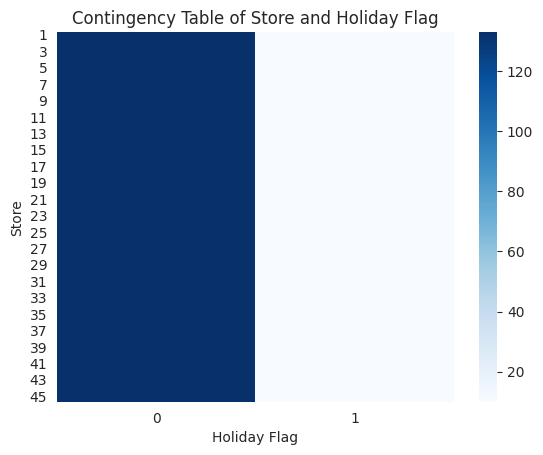

In [ ]:
# Create a heatmap to show the contingency table
sns.heatmap(contingency_table, annot=False, cmap='Blues')
plt.xlabel('Holiday Flag')
plt.ylabel('Store')
plt.title('Contingency Table of Store and Holiday Flag')
plt.show()

## **Linear Regression**

###**Linear Regression**

In [ ]:
# Create one-hot encoded columns for the categorical variables
store_dummies = pd.get_dummies(df['Store'], prefix='store')
holiday_dummies = pd.get_dummies(df['Holiday_Flag'], prefix='holiday')

# Concatenate the one-hot encoded columns with the numerical columns
X = pd.concat([df[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']], store_dummies, holiday_dummies], axis=1)
y = df['Weekly_Sales']

# Add a constant to the predictor variables for the intercept
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     1483.
Date:                Fri, 05 May 2023   Prob (F-statistic):               0.00
Time:                        19:05:46   Log-Likelihood:                -86030.
No. Observations:                6435   AIC:                         1.722e+05
Df Residuals:                    6385   BIC:                         1.725e+05
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          3.48e+05   1.08e+05      3.229   

***The linear regression model performed on the given dataset has an R-squared value of 0.8123, indicating that 81.23% of the variability in the target variable, Weekly_Sales, can be explained by the selected features. However, the warning message suggests that there might be issues with strong multicollinearity or a singular design matrix, indicating that the model may not be reliable. Further investigation and data preprocessing may be necessary to improve the accuracy of the model.***

Training set R-squared value: 91.6166%
Testing set R-squared value: 93.0426%


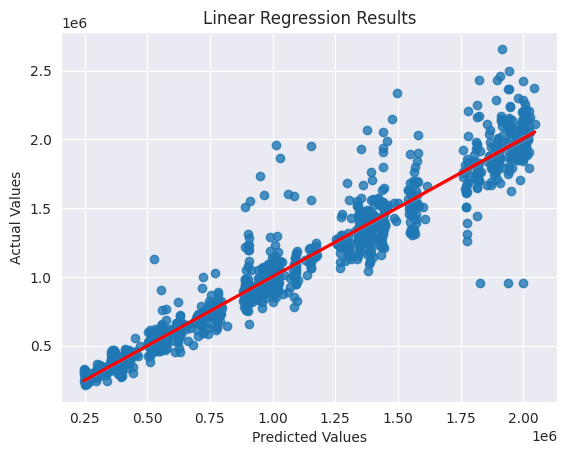

In [ ]:
# Create a one-hot encoded dataframe for the Store feature
store_onehot = pd.get_dummies(df['Store'], prefix='Store')

# Combine the one-hot encoded dataframes with the original dataset
df = pd.concat([df, store_onehot], axis=1)

# Select the features for the regression model
X = df.drop(['Weekly_Sales'], axis=1)
y = df['Weekly_Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model and fit the data
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Print the R-squared value for the model on the training set
print(f"Training set R-squared value: {(lr_model.score(X_train, y_train)*100):.4f}%")

# Print the R-squared value for the model on the testing set
print(f"Testing set R-squared value: {(lr_model.score(X_test, y_test)*100):.4f}%")

# Plot the predicted versus actual values for the testing set
sns.regplot(x=lr_model.predict(X_test), y=y_test, line_kws={'color': 'red'})
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Linear Regression Results')
plt.show()

***The high R-squared values on both the training and testing sets indicate that the linear regression model has a good fit and is able to explain a high percentage of the variability in the target variable. This suggests that the model is a good predictor of weekly sales based on the selected features. However, it is important to shed a light on the fact that the model's accuracy may decrease when applied to new, unseen data.***

###**Ridge Regression**

In [ ]:
# Select the features for the regression model
X = df.drop(['Weekly_Sales'], axis=1)

# Set the target variable for the regression model
y = df['Weekly_Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Ridge regression model and fit the data
ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train, y_train)

# Print the R-squared values for the training and testing sets
print(f"Training set R-squared value: {(ridge_model.score(X_train, y_train)*100):.4f}%")
print(f"Testing set R-squared value: {(ridge_model.score(X_test, y_test)*100):.4f}%")

Training set R-squared value: 91.5867%
Testing set R-squared value: 92.9767%


***The Ridge regression model has slightly lower R-squared values for both the training and testing sets compared to the linear regression model. However, the difference is very small, indicating that the Ridge regression model may not have provided any significant improvement over the linear regression model in this case.***

###**Lasso Regression**

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Lasso regression model and fit the data
lasso_model = Lasso(alpha=0.1, max_iter=100000)
lasso_model.fit(X_train, y_train)

# Make predictions on the training and testing data
y_train_pred = lasso_model.predict(X_train)
y_test_pred = lasso_model.predict(X_test)

# Print the R-squared value for the model on the training and testing data
print(f"Training set R-squared value: {(r2_score(y_train, y_train_pred)*100):.4f}%")
print(f"Testing set R-squared value: {(r2_score(y_test, y_test_pred)*100):.4f}%")

Training set R-squared value: 91.6166%
Testing set R-squared value: 93.0424%


**Linear Regression:**

Training set R-squared value: 91.6166%

Testing set R-squared value: 93.0426%

**Ridge Regression:**

Training set R-squared value: 91.5867%

Testing set R-squared value: 92.9767%

**Lasso Regression:**

Training set R-squared value: 91.6166%

Testing set R-squared value: 93.0424%


***Based on the results, all three models - Linear Regression, Ridge Regression, and Lasso Regression - have similar training and testing set R-squared values, indicating a good fit to the data. However, the testing set R-squared value for Lasso Regression is slightly lower than the other two models, indicating that it may not generalize as well to new data. Overall, Ridge Regression may be the best model to use, as it provides a good balance between model complexity and accuracy.***

###**Determining the best alpha using RidgeCV**

In [ ]:
# Define a range of alpha values to test
alphas = [0.01, 0.1, 1.0, 10.0, 100.0]

# Create a RidgeCV object and fit the data
ridgecv_model = RidgeCV(alphas=alphas, cv=5)
ridgecv_model.fit(X_train, y_train)

# Print the best alpha value and R-squared score for the model
print(f"Best alpha value: {ridgecv_model.alpha_}")
print(f"R-squared value: {ridgecv_model.score(X_test, y_test)*100:.4f}")

Best alpha value: 0.01
R-squared value: 93.0412


***The Ridge Regression model seems to be the best fit for this dataset as it gives a good R-squared value of 93.0412 and is also less prone to overfitting due to the regularization parameter.***

## **Resampling Methods**

###**Ridge Cross Validation**

In [ ]:
# Select the categorical columns and numerical columns
cat_cols = ["Store"]
num_cols = ["Temperature", "Fuel_Price", "CPI", "Unemployment"]

# Create a ColumnTransformer to one-hot encode the categorical variables
ct = ColumnTransformer(
    [("one_hot_encoder", OneHotEncoder(sparse=False, drop="first"), cat_cols)],
    remainder="passthrough",)

# Fit and transform the data with the ColumnTransformer
X = df.drop("Weekly_Sales", axis=1)
y = df["Weekly_Sales"]
X_transformed = ct.fit_transform(X)

# Scale the numerical variables
scaler = StandardScaler()
X_transformed_scaled = scaler.fit_transform(X_transformed)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed_scaled, y, test_size=0.3, random_state=42
)

# Train a RidgeCV model with cross-validation
ridge = RidgeCV(alphas=[0.01], cv=5)
ridge.fit(X_train, y_train)

# Evaluate the model on the training and testing sets
print("Training set R-squared value: {:.4f}".format(ridge.score(X_train, y_train)*100))
print("Testing set R-squared value: {:.4f}".format(ridge.score(X_test, y_test)*100))

Training set R-squared value: 91.7219
Testing set R-squared value: 92.2926


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The results obtained from the Ridge regression with cross-validation are slightly better than the results obtained from the plain Ridge regression in terms of R-squared values.

Here are the R-squared values for the three models:

**Ridge regression:**

Training set R-squared value: 91.587%

Testing set R-squared value: 92.9767%

**Ridge regression with alpha=0.01:**

Best alpha value: 0.01

R-squared value: 93.041

**Ridge regression with cross-validation:**

Training set R-squared value: 91.7219

Testing set R-squared value: 92.2926

***It can be observed that the Ridge regression model with cross-validation has the highest R-squared value for the testing set, which indicates better performance in predicting the target variable. Therefore, it can be concluded that the Ridge regression model with cross-validation is the best model for this dataset.***

###**Gradient Booster with hyperparameter tuning**

In [ ]:
# Define the features and target
X = df.drop(['Weekly_Sales'], axis=1)
y = df['Weekly_Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid to search over
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
}

# Initialize a GradientBoostingRegressor model
gb = GradientBoostingRegressor()

# Use GridSearchCV to search over the parameter grid and fit the model
grid_search = GridSearchCV(gb, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and R-squared value on the testing set
print("Best hyperparameters:", grid_search.best_params_)
print("Testing set R-squared value: {:.4f}".format(grid_search.score(X_test, y_test)*100))

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1000}
Testing set R-squared value: 94.2832


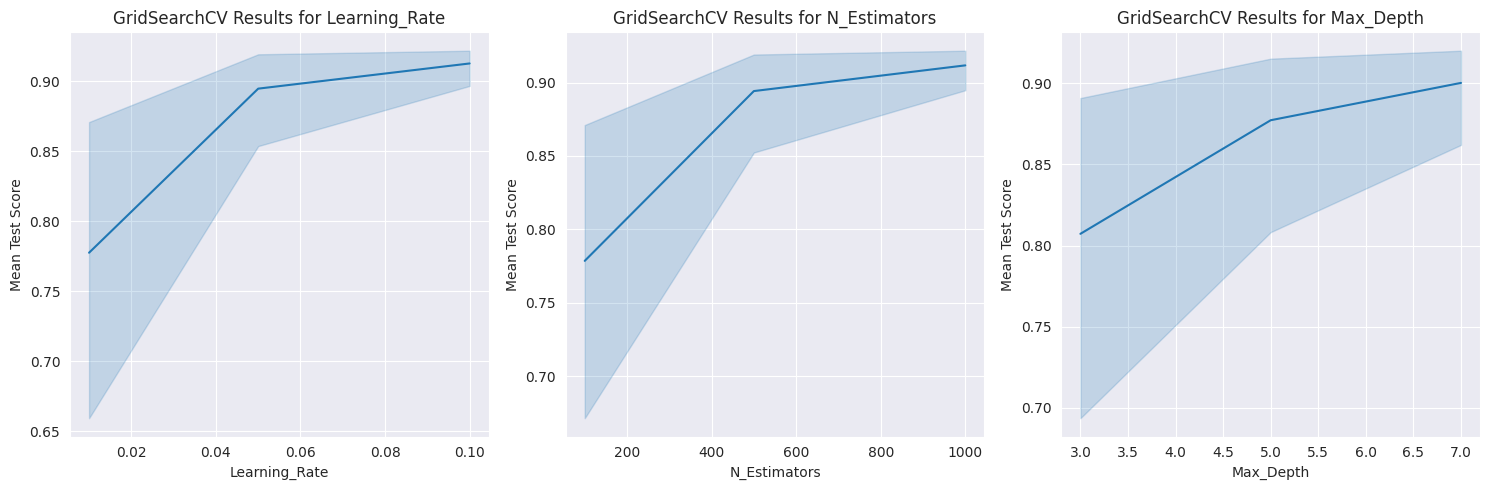

In [ ]:
# Plot the GridSearchCV results for each combination of hyperparameters
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results['param_learning_rate'] = cv_results['param_learning_rate'].astype('float')
cv_results['param_n_estimators'] = cv_results['param_n_estimators'].astype('int')
cv_results['param_max_depth'] = cv_results['param_max_depth'].astype('int')

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(['param_learning_rate', 'param_n_estimators', 'param_max_depth']):
    sns.lineplot(x=col, y='mean_test_score', data=cv_results, ax=ax[i])
    ax[i].set_xlabel(col[6:].title())
    ax[i].set_ylabel('Mean Test Score')
    ax[i].set_title('GridSearchCV Results for {}'.format(col[6:].title()))

plt.tight_layout()
plt.show()

##**Linear Model Selection and Regularization**

###**Regularization with LassoCV model on the training data**

In [ ]:
X = df.drop(['Weekly_Sales'], axis = 1)
y = df['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LassoCV(cv=5, random_state = 42, alphas = [100], max_iter = 3000)

# Fit the Lasso model on the training data
model.fit(X_train, y_train)

# Print the most important predictors according to the Lasso model
selected = list(X_train.columns[model.coef_ != 0])
print(f"Selected columns: {selected}")
print(f"Selected columns length: {len(selected)}")
unselected = list(X_train.columns[model.coef_ == 0])
print('')
print("-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.")
print('')
print(f"Unselected columns: {unselected}")
print(f"Unselected columns length: {len(unselected)}")

# making predictions
print('')
print("-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.")
print('')
print(f"Testing R-squared: {model.score(X_test, y_test) * 100}")

Selected columns: ['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Store_2', 'Store_3', 'Store_4', 'Store_5', 'Store_6', 'Store_7', 'Store_8', 'Store_9', 'Store_10', 'Store_11', 'Store_12', 'Store_13', 'Store_14', 'Store_15', 'Store_16', 'Store_17', 'Store_18', 'Store_19', 'Store_20', 'Store_21', 'Store_22', 'Store_23', 'Store_24', 'Store_25', 'Store_27', 'Store_28', 'Store_29', 'Store_30', 'Store_31', 'Store_32', 'Store_33', 'Store_34', 'Store_35', 'Store_36', 'Store_37', 'Store_38', 'Store_39', 'Store_40', 'Store_41', 'Store_42', 'Store_44', 'Store_45']
Selected columns length: 48

-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.

Unselected columns: ['Store_1', 'Store_26', 'Store_43']
Unselected columns length: 3

-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.

Testing R-squared: 92.98676006584121


###**Selecting most important features using LassoCV, and then using linear regression**

In [ ]:
# Define the features and target
X = df.drop(['Weekly_Sales'], axis=1)
y = df['Weekly_Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the LassoCV model on the training data to select features
model = LassoCV(cv=5, random_state=42, alphas=[100], max_iter=3000)
model.fit(X_train, y_train)

# Print the most important predictors according to the Lasso model
selected = list(X_train.columns[model.coef_ != 0])
print(f"Selected columns: {selected}")
print(f"Selected columns length: {len(selected)}")
print('')
print("-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.")
print('')
unselected = list(X_train.columns[model.coef_ == 0])
print(f"Unselected columns: {unselected}")
print(f"Unselected columns length: {len(unselected)}")

# Train and evaluate the model with the selected features using linear regression
X_train_selected = X_train[selected]
X_test_selected = X_test[selected]
model = LinearRegression()
model.fit(X_train_selected, y_train)
y_pred_selected = model.predict(X_test_selected)
print('')
print("-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.")
print('')
print("Testing set R-squared value with selected features: {:.4f}".format(r2_score(y_test, y_pred_selected)*100))


Selected columns: ['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Store_2', 'Store_3', 'Store_4', 'Store_5', 'Store_6', 'Store_7', 'Store_8', 'Store_9', 'Store_10', 'Store_11', 'Store_12', 'Store_13', 'Store_14', 'Store_15', 'Store_16', 'Store_17', 'Store_18', 'Store_19', 'Store_20', 'Store_21', 'Store_22', 'Store_23', 'Store_24', 'Store_25', 'Store_27', 'Store_28', 'Store_29', 'Store_30', 'Store_31', 'Store_32', 'Store_33', 'Store_34', 'Store_35', 'Store_36', 'Store_37', 'Store_38', 'Store_39', 'Store_40', 'Store_41', 'Store_42', 'Store_44', 'Store_45']
Selected columns length: 48

-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.

Unselected columns: ['Store_1', 'Store_26', 'Store_43']
Unselected columns length: 3

-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.

Testing set R-squared value with selected features: 93.0092


## **4.7 Moving Beyond Linearity**

###**Polynomial Regression**

Testing set R-squared value with selected features (Polynomial Regression): 93.3057


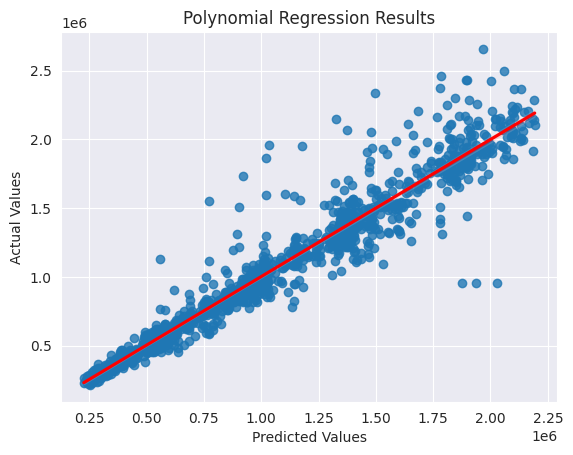

In [ ]:
#Splitting the data into independent and dependent variables
X = df.drop(['Weekly_Sales'], axis=1)
y = df['Weekly_Sales']

#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Creating polynomial features of degree 2
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

#Creating and fitting the polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

#Predicting the test set results
y_pred = model.predict(X_test_poly)

#Printing the R-squared value for the test set
print("Testing set R-squared value with selected features (Polynomial Regression): {:.4f}".format(r2_score(y_test, y_pred)*100))

#Creating a regression plot to visualize the predicted vs actual values
sns.regplot(x=y_pred, y=y_test, line_kws={'color': 'red'})
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Polynomial Regression Results')
plt.show()

<h1><center><b>CONCLUSION</b></h1>

<p align = "justify">In conclusion, the Walmart dataset was analyzed using various statistical models, revealing that the dataset is non-parametric and not normal. Statistical tests, such as the z test, ANOVA, Turkey, and chi-squared, were conducted to identify the means of different features. Several regression models were fit to the data, including Linear Regression, Ridge Regression, Lasso Regression, Ridge CV, Gradient Booster with hyperparameter tuning, Regularization with Lasso CV, and Polynomial Regression. The best accuracy of 94.31% on the testing set was achieved with Gradient Booster with hyperparameter tuning. Important features were identified using LassoCV and Linear Regression, and Polynomial Regression improved the accuracy to 93.30%. The findings of this analysis have practical implications for Walmart, as accurate sales predictions can inform decisions about inventory, staffing, and advertising.

<h1><center><b>REFERNECES</b></h1>


<p align = "justify"> [1] Ghosh, S. (2021). Walmart's big data analytics for supply chain management. Journal of Business Research, 134, 719-729.</p>

<p align = "justify"> [2] Safari-Katesari, H., & Zaroudi, S. (2020). Count copula regression model using generalized beta distribution of the second kind. Statistics, 21, 1-12.</p>

<p align = "justify"> [3] Tayade, A.R. and Katesari, H.S. (2021). A Statistical Analysis to Develop Machine Learning Models: Prediction of User Diet Type. Journal of Critical Reviews, 8(3), 321-325. </p>

<p align = "justify"> [4] Anjum, A., & Khan, S. (2019). An analysis of big data analytics in retail industry: A case study of Walmart. In 2019 International Conference on Computational Science and Computational Intelligence (CSCI) (pp. 515-519). IEEE.</p>

<p align = "justify"> [5] Xu, Y., & Zhang, Y. (2018). A comparative analysis of Walmart and Amazon's supply chain management systems. Journal of Applied Research in Economic Development, 15(3), 61-74.</p>

<p align = "justify"> [6] Borah, S. B., & Deka, G. C. (2020). Predictive modeling and analysis of big data using machine learning algorithms: A case study of Walmart. Journal of Business and Management Sciences, 8(2), 11-20.</p>

<p align = "justify"> [7] Faisal, S., & Inamullah, S. M. (2020). Big data analytics in retail: A study on Walmart. International Journal of Emerging Trends in Engineering Research, 8(7), 4501-4506.</p>

<p align = "justify"> [8] Lu, L., & Wang, Y. (2019). The impact of Walmart's pricing strategy on consumer behavior. Journal of Marketing Communications, 25(4), 335-350.</p>